
# K Means Clustering with Python

This notebook is just a code reference for the video lecture and reading.

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [ ]:
import pandas as pd
import os # use commandline  
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
customers = pd.read_csv(io.BytesIO(uploaded['customers.csv']))
customers.head()

Saving customers.csv to customers (1).csv


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Visualize Data

Text(0, 0.5, 'Spending Score')

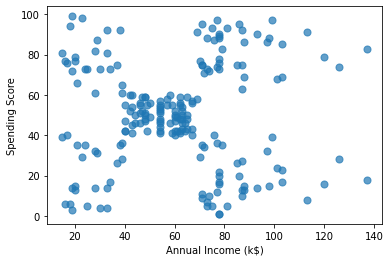

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
points = customers.iloc[:, 3:5].values
x = points[:, 0]
y = points[:, 1]
plt.scatter(x, y, s=50, alpha=0.7) #s = ขนาดของจุด, alpha =ระดับความคมชัดของจุด
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

# Clustering with K-means 

**Use the following code to segment the customers into five clusters and highlight the clusters: **



In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points) # สร้าง model



KMeans(n_clusters=5, random_state=0)

****

In [ ]:
kmeans.labels_ #เพื่อดูข้อมูลแต่ละ instances ว่าอยู่ cluster ใด

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

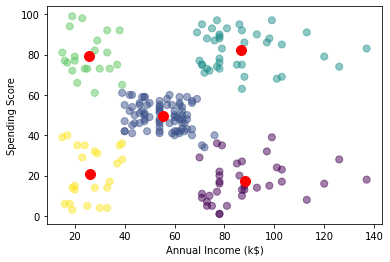

In [ ]:
plt.scatter(x, y, c=kmeans.labels_, s=50, alpha=0.5, cmap='viridis') #ลองปรับค่า cmap = rainbow     
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
centers = kmeans.cluster_centers_ #ดึงค่า centroid ของแต่ละ cluster มาเก็บไว้ที่ centers เป็น array 2 มิติ 5 แถว  2 คอลัมน์
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100) #0 คือ แกน x ,1 คือแกน y

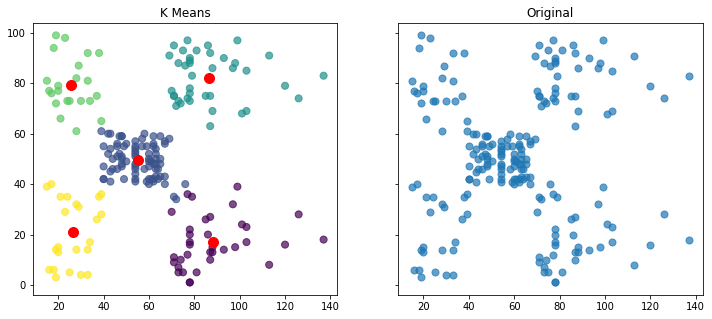

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,5)) #figsize มาตรฐานจะเป็น  8x6 ดังนั้นจึงได้ภาพขนาด 640x480 
ax1.set_title('K Means')
ax1.scatter(x, y, c=kmeans.labels_, s=50, alpha=0.7, cmap='viridis')
ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=100)
ax2.set_title("Original")
ax2.scatter(x, y, s=50, alpha=0.7,cmap='rainbow')

# ค่า centroid ของแต่ละ clusters

In [ ]:
centers

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

# Inertia
The KMeans algorithm clusters data by trying to separate samples in n groups of equal variances, minimizing a criterion known as inertia, or within-cluster sum-of-squares Inertia, or the within-cluster sum of squares criterion, can be recognized as a measure of how internally coherent clusters are.

Inertia is not a normalized metric.

The lower values of inertia are better and zero is optimal.

But in very high-dimensional spaces, euclidean distances tend to become inflated (this is an instance of curse of dimensionality).

Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

We can calculate model inertia as follows:-

In [ ]:
kmeans.inertia_

44448.4554479337

# Segment Customers on Many Attributes

The previous example was an easy one because you used just two variables: annual incomes and spending scores. You could have done the same without help from machine learning. But now let’s segment the customers again, this time using everything except the customer IDs. Start by replacing the strings “Male” and “Female” in the “Gender” column with 1s and 0s, a process known as label encoding. This is necessary because machine learning can only deal with numerical data.

In [ ]:
from sklearn.preprocessing import LabelEncoder
df = customers.copy()
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Elbow Method
Extract the gender, age, annual income, and spending score columns. Then use the elbow method to determine the optimum number of clusters based on these features.
The elbow is less distinct this time, but 5 appears to be a reasonable number.

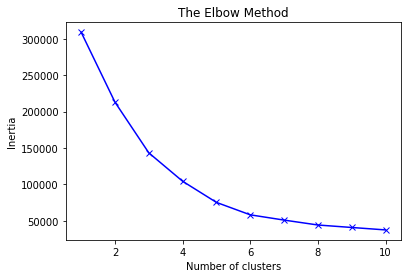

In [ ]:
from sklearn.cluster import KMeans
points = df.iloc[:, 1:5].values
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  max_iter = 300, random_state = 0)
    kmeans.fit(points)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia,'bx-') #ิbx- คือสัญลักษณะของกราฟในแต่ละคลัสเตอร์
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
df['Cluster'] = kmeans.labels_
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


#Save Dataframe to csv file#

In [ ]:
df.to_csv('customer_cluster.csv',index=False)

In [ ]:
centers = kmeans.cluster_centers_  #5 clusters and 4 attributes
centers 

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

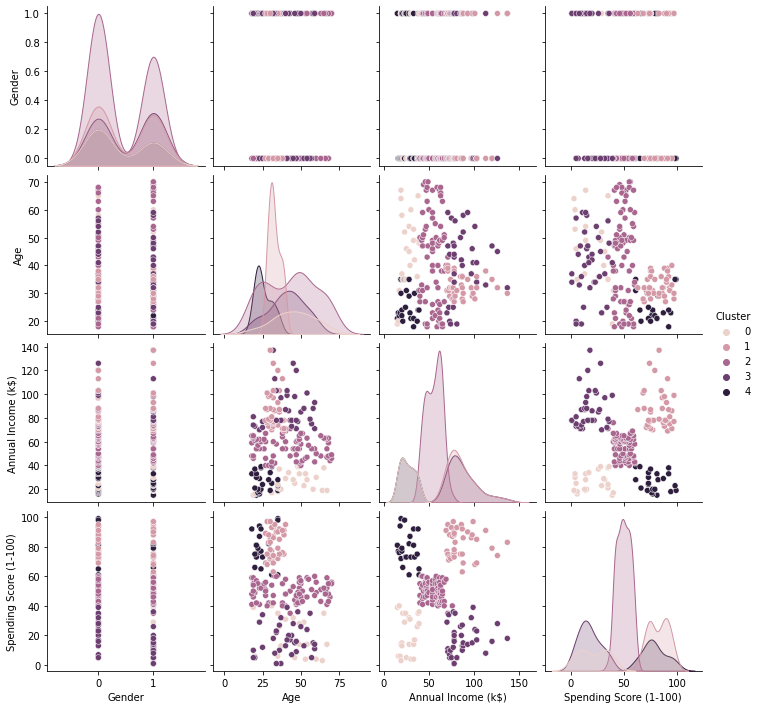

In [ ]:
 df = df.drop(['CustomerID'],axis=1)
 sns.pairplot(df,hue='Cluster')

# Principal Component Analysis and k-means Clustering to Visualize a High Dimensional Dataset

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(df)
pca_2d = pca.transform(df)
newdf = pd.DataFrame(pca_2d);
newdf['Cluster'] = kmeans.labels_
newdf

,0,1,Cluster
0,-31.868647,-33.002797,0
1,0.777133,-56.846345,4
2,-57.409846,-13.130521,0
3,-2.156413,-53.482481,4
4,-32.173297,-30.389899,0
...,...,...,...
195,58.345755,31.028227,1
196,19.899987,66.447283,3
197,58.512983,38.356702,1
198,20.969320,79.377590,3


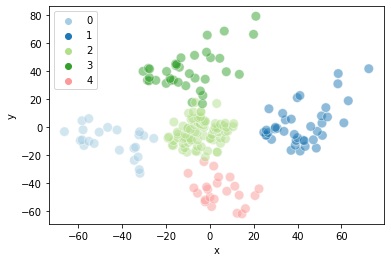

In [ ]:
sns.scatterplot(x=newdf[0], y=newdf[1], hue="Cluster", data=newdf, palette='Paired', s=90, alpha = 0.5,cmap = 'viridis');
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best');

In [ ]:
centers

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

# ปรับค่า centroid ให้เป็นจำนวนเต็มเพื่อง่ายต่อการตีความ

In [ ]:

newcenters = pd.DataFrame(centers)
newcenters.round(0).astype('int') #ปัดเศษขึ้นลงตามค่าที่ใกล้เคียง

,0,1,2,3
0,0,45,26,21
1,0,33,87,82
2,0,43,55,50
3,1,41,88,18
4,0,26,26,79


In [ ]:
kmeans.inertia_

75399.61541401484

# Assign cluster labels for unseen data
The KMeans Cluster is unsupervised ML model. That means there won't be any labelled data for training and prediction also. It takes training data and based on model tuning it tries cluster the training data and assign cluster labels for each cluster.

In [ ]:

X=[[1,23 ,26 ,340],[0,45,13,12]]  #two unseen data
C_clustered=kmeans.predict(X)
print(C_clustered) 

[4 0]


# Great Job!

# Exercises
ใหนักศึกษาทดลองจัดกลุ่มข้อมูลกับชุดข้อมูล bank_cluster.csv โดยมีกระบวนการดังนี้
1.  สำรวจและแสดงรายละเอียดของชุดข้อมูล ทำการ preprocess ตามที่เห็นสมควร
2.  ทำการหาจำนวนกลุ่มที่เหมาะสมสำหรับชุดข้อมูลนี้ด้วย elblow 
3.  แสดง centroid ของแต่ละ cluster จากโมเดลที่ดีที่สุดตามค่า k ที่เลือก
4.  แสดงค่า SSE ที่ได้
5.  plot graph ที่ได้จากการจัดกลุ่มข้อมูลโดยใช้ทุก attribute ที่มี
6.  บันทึกข้อมูลการจัดกลุ่มลงในไฟล์ new_bankcluster.csv  
7.   พิมพ์ข้อความเพื่ออธิบายผลลัพธ์ที่ได้จากการจัดกลุ่ม (พิมพ์บรรยายเอง)
8. โมเดลที่ดีที่สุดมาจัดกลุ่มชุดข้อมูลใหม่เพื่อพิจารณาว่าลูกค้าคนใหม่ 5 คนว่าควรอยู่กลุ่มใด 

และทดลองใช้ชุดข้อมูลเดียวกันนี้จำแนกด้วย  Hierarchical Clustering   แล้วพิจารณาการตัดกลุ่มเพื่อเปรียบเทียบกัน

#กรณีเปลี่ยนใช้ Distance แบบอื่นๆ  จะใช้ Libray pyclustering

In [ ]:
pip  install pyclustering

     |████████████████████████████████| 2.6 MB 6.8 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=611a23747a8c2892112ed0ebebb9c622dc248e019b8cba661a9c029694de681f
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import type_metric, distance_metric;

In [ ]:
# Prepare initial centers using K-Means++ method.
initial_centers = kmeans_plusplus_initializer(points, 5).initialize() # กำหนดค่า k
# create metric that will be used for clustering
# see name of metric https://pyclustering.github.io/docs/0.9.3/html/da/d3a/classpyclustering_1_1utils_1_1metric_1_1type__metric.html#ad4419ac00c1f1c484f86d0af82bf0164
manhattan_metric = distance_metric(type_metric.MANHATTAN) #use manhattan distance 
# create instance of K-Means using specific distance metric:
kmeans_instance = kmeans(points, initial_centers, metric=manhattan_metric)
# run cluster analysis and obtain results
kmeans_instance.process()
 


In [ ]:
centroid = kmeans_instance.get_centers()
centroid


[[0.4230769230769231,
  43.282051282051285,
  55.02564102564103,
  49.69230769230769],
 [0.46153846153846156,
  32.69230769230769,
  86.53846153846153,
  82.12820512820512],
 [0.5135135135135135, 40.32432432432432, 87.43243243243244, 18.18918918918919],
 [0.391304347826087, 45.21739130434783, 26.304347826086957, 20.91304347826087],
 [0.391304347826087, 25.52173913043478, 26.304347826086957, 78.56521739130434]]

## ปรับค่า centroid ให้เป็นจำนวนเต็มเพื่อง่ายต่อการตีความ

In [ ]:
newcenters = pd.DataFrame(centroid)
newcenters.round(0).astype('int') #ปัดเศษขึ้นลงตามค่าที่ใกล้เคียง

,0,1,2,3
0,0,43,55,50
1,0,33,87,82
2,1,40,87,18
3,0,45,26,21
4,0,26,26,79
